See the O$_2$sclpy documentation at
https://neutronstars.utk.edu/code/o2sclpy for more information.

In [53]:
import o2sclpy
import matplotlib.pyplot as plot
import sys
import math
import numpy

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the o2scl library:

In [54]:
link=o2sclpy.linker()
link.link_o2scl()

In [55]:
def f(x):
    return math.sin(1.0/(0.3+x))

In [56]:
xa=[0 for i in range(0,20)]
ya=[0 for i in range(0,20)]
for i in range(0,20):
    if i>0:
        xa[i]=xa[i-1]+((i)/40)**2
    ya[i]=math.sin(1.0/(0.3+xa[i]))

In [57]:
m=numpy.mean(ya)
s=numpy.std(ya,ddof=1)
print('mean: %7.6e, std: %7.6e' % (m,s))
ya2=[(ya[i]-m)/s for i in range(0,20)]

mean 5.008483e-01 std 4.304529e-01


We create a table object and specify a blank name to indicate
that we just want to read the first table in the file.

In [58]:
xp=o2sclpy.std_vector(link)
yp=o2sclpy.std_vector(link)
xp.resize(20)
yp.resize(20)
for i in range(0,20):
    xp[i]=xa[i]
    yp[i]=ya2[i]

In [59]:
iv_lin=o2sclpy.interp_vec(link)
iv_lin.set(20,xp,yp,o2sclpy.itp_linear)
iv_csp=o2sclpy.interp_vec(link)
iv_csp.set(20,xp,yp,o2sclpy.itp_cspline)
iv_aki=o2sclpy.interp_vec(link)
iv_aki.set(20,xp,yp,o2sclpy.itp_akima)
iv_mon=o2sclpy.interp_vec(link)
iv_mon.set(20,xp,yp,o2sclpy.itp_monotonic)
iv_stef=o2sclpy.interp_vec(link)
iv_stef.set(20,xp,yp,o2sclpy.itp_steffen)

In [60]:
iv_ko=o2sclpy.interp_vec(link)
iv_ko.set(20,xp,yp,o2sclpy.itp_steffen)

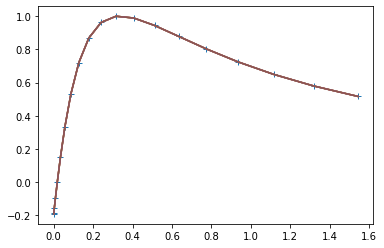

In [61]:
plot.plot(xa,ya,lw=0,marker='+')
plot.plot(xa,[iv_lin.eval(xa[i])*s+m for i in range(0,20)])
plot.plot(xa,[iv_csp.eval(xa[i])*s+m for i in range(0,20)])
plot.plot(xa,[iv_aki.eval(xa[i])*s+m for i in range(0,20)])
plot.plot(xa,[iv_mon.eval(xa[i])*s+m for i in range(0,20)])
plot.plot(xa,[iv_stef.eval(xa[i])*s+m for i in range(0,20)])

In [62]:
max=xa[19]
xb=[i/2000.0*max for i in range(0,2001)]

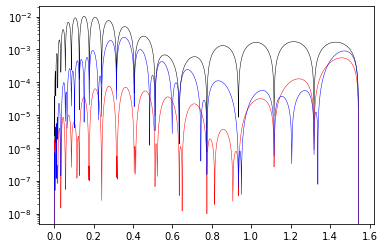

In [64]:
plot.semilogy(xb,[abs(f(xb[i])-(iv_lin.eval(xb[i])*s+m)) 
                  for i in range(0,2001)],color='black',lw=0.5)
plot.semilogy(xb,[abs(f(xb[i])-(iv_csp.eval(xb[i])*s+m)) 
                  for i in range(0,2001)],color='red',lw=0.5)
plot.semilogy(xb,[abs(f(xb[i])-(iv_stef.eval(xb[i])*s+m)) 
                  for i in range(0,2001)],color='blue',lw=0.5)